# io

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
import skimage 
raw = skimage.io.imread("../images/raw.jpg")

In [3]:
def show(image,gray=True):
    if gray:
        sns.heatmap(image,cmap='gray',rasterized=True)
#         plt.imshow(image,cmap='gray')
    else:
        plt.imshow(image,rasterized=True)

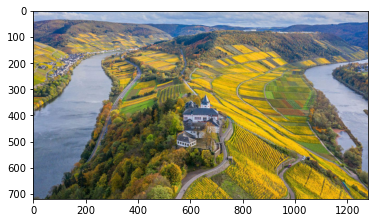

In [4]:
show(raw,gray=False)

# 计算图像有关的统计参数

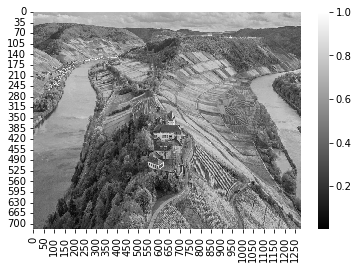

In [5]:
# https://scikit-image.org/docs/stable/auto_examples/color_exposure/plot_rgb_to_gray.html
gray = skimage.color.rgb2gray(raw)
show(gray)

In [6]:
gray.shape

(719, 1280)

In [7]:
import pandas as pd

In [8]:
df = pd.Series(gray.flatten())
df.describe()

count    920320.000000
mean          0.492162
std           0.175831
min           0.002500
25%           0.361878
50%           0.486136
75%           0.645378
max           1.000000
dtype: float64

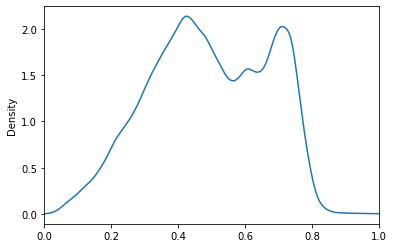

In [9]:
df.plot(kind='kde')
plt.xlim(0,1)
plt.savefig("../figures/kde.pdf")

# 处理

## 添加高斯噪声

In [10]:
import numpy as np

In [11]:
mean = 0
sigma = 0.1
gaussian = np.random.normal(mean, sigma, (raw.shape[0],raw.shape[1])) 
noisy = gray + gaussian 

In [12]:
noisy[noisy<0] = 0
noisy[noisy>255] = 255

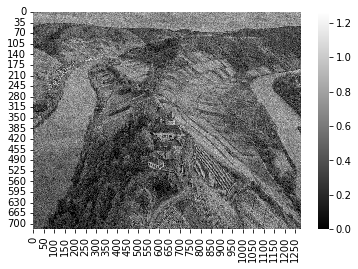

In [13]:
show(noisy)

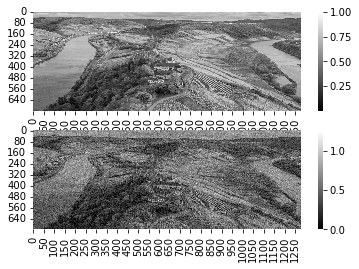

In [14]:
plt.subplot(2,1,1)
show(gray)
plt.subplot(2,1,2)
show(noisy)

plt.savefig("../figures/noisy.pdf",bbox_inches="tight")

In [15]:
df = pd.DataFrame({"raw": gray.flatten() , "noisy": noisy.flatten()})
df.describe()

raw          noisy
count  920320.000000  920320.000000
mean        0.492162       0.492511
std         0.175831       0.201700
min         0.002500       0.000000
25%         0.361878       0.346598
50%         0.486136       0.493623
75%         0.645378       0.644874
max         1.000000       1.263139

In [16]:
noisy_flattern = noisy.copy()
noisy_flattern.shape = noisy.shape[0]*noisy.shape[1]

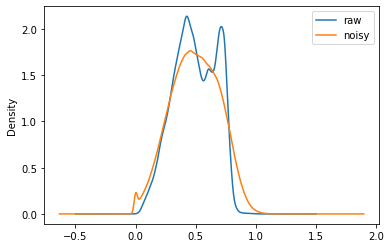

In [17]:
df.plot(kind='kde')
plt.savefig("../figures/noisy_raw.pdf")

## 改变图像大小

### 改变矩阵大小

In [18]:
raw.shape

(719, 1280, 3)

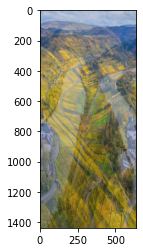

In [19]:
half = raw.copy()
half.shape = raw.shape[0]*2, raw.shape[1]//2,3
show(half,gray=False)

### 使用 skimage.transform.rescale

In [20]:
# https://scikit-image.org/docs/stable/auto_examples/transform/plot_rescale.html
shrink = skimage.transform.rescale(gray,0.25) 
shrink.shape

(180, 320)

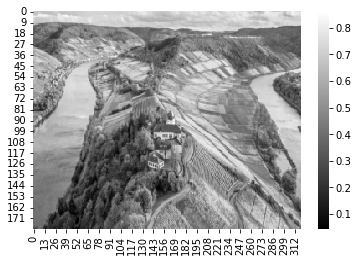

In [21]:
show(shrink)
plt.savefig("../figures/shrink.pdf")

In [22]:
df = pd.DataFrame.from_dict({"raw":gray.flatten(), "rotated":shrink.flatten()},orient="index").T

In [23]:
df.describe()

raw       rotated
count  920320.000000  57600.000000
mean        0.492162      0.492166
std         0.175831      0.161819
min         0.002500      0.045238
25%         0.361878      0.378812
50%         0.486136      0.487705
75%         0.645378      0.626878
max         1.000000      0.862434

<AxesSubplot:ylabel='Density'>

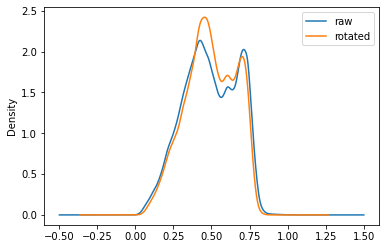

In [24]:
df.plot(kind='kde')

## 旋转图像

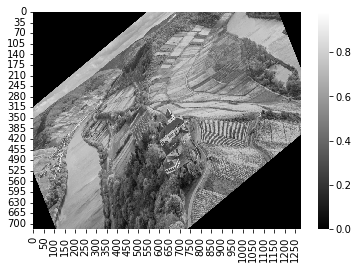

In [25]:
rotated = skimage.transform.rotate(gray,30)
show(rotated)
plt.savefig("../figures/rotated.pdf")

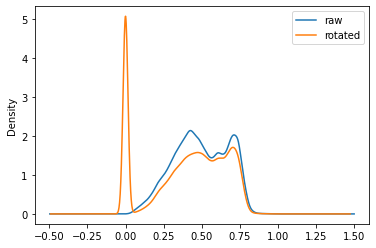

In [26]:
pd.DataFrame({"raw":gray.flatten(), "rotated":rotated.flatten()}).plot(kind='kde')
plt.savefig("../figures/rotated_kde.pdf")

## 裁剪

In [27]:
clipped = gray[:gray.shape[0]//2,:]

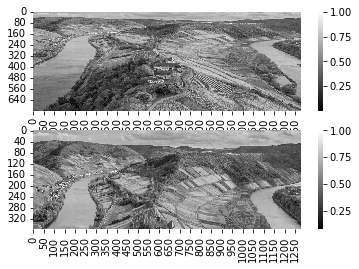

In [28]:
plt.subplot(2,1,1)
show(gray)
plt.subplot(2,1,2)
plt.ylim(0,1080)
show(clipped)

plt.savefig("../figures/clipped.pdf",bbox_inches="tight")

In [29]:
df = pd.DataFrame.from_dict({"raw":gray.flatten(), "clipped":clipped.flatten()},orient="index").T
df.describe()

raw        clipped
count  920320.000000  459520.000000
mean        0.492162       0.545048
std         0.175831       0.157891
min         0.002500       0.073879
25%         0.361878       0.412784
50%         0.486136       0.551889
75%         0.645378       0.692458
max         1.000000       1.000000

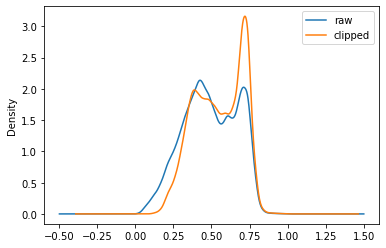

In [30]:
df.plot(kind='kde')
plt.savefig("../figures/clipped_kde.pdf")

# 增强操作

## 图像的对比度变换

### RGB

In [31]:
from ipywidgets import interact

def update(gamma = 1.0):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    gamma_corrected = skimage.exposure.adjust_gamma(raw, gamma)
    ax.set_title(f"$\gamma$ = {gamma}")
    ax.imshow(gamma_corrected)

    fig.canvas.draw()

interact(update,gamma=(0.1,3));

interactive(children=(FloatSlider(value=1.0, description='gamma', max=3.0, min=0.1), Output()), _dom_classes=(…

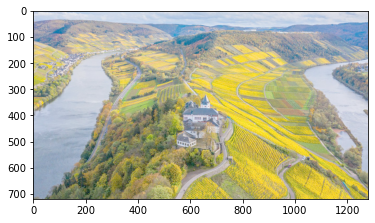

In [32]:
gamma_corrected_light = skimage.exposure.adjust_gamma(raw, 0.5)
show(gamma_corrected_light,gray=False)

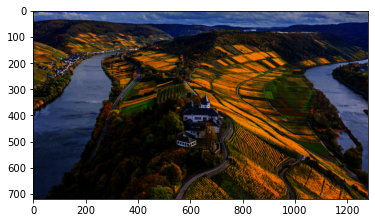

In [33]:
gamma_corrected_dark = skimage.exposure.adjust_gamma(raw, 3)
show(gamma_corrected_dark,gray=False)

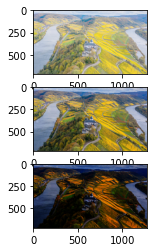

In [34]:
plt.subplot(3,1,1)
show(gamma_corrected_light, gray=False)

plt.subplot(3,1,2)
show(raw, gray=False)

plt.subplot(3,1,3)
show(gamma_corrected_dark, gray=False)

plt.savefig("../figures/gamma.pdf",bbox_inches="tight")

### Gray

In [35]:

def update(gamma = 1.0):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    gamma_corrected = skimage.exposure.adjust_gamma(gray, gamma)
    ax.set_title(f"$\gamma$ = {gamma}")
    ax.imshow(gamma_corrected,cmap="gray")

    fig.canvas.draw()

interact(update,gamma=(0.1,3));

interactive(children=(FloatSlider(value=1.0, description='gamma', max=3.0, min=0.1), Output()), _dom_classes=(…

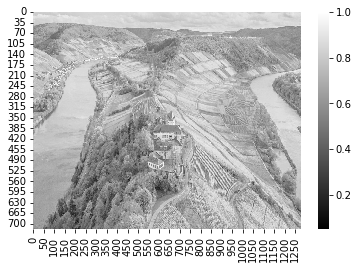

In [36]:
gamma_corrected_light = skimage.exposure.adjust_gamma(gray, 0.5)
show(gamma_corrected_light)

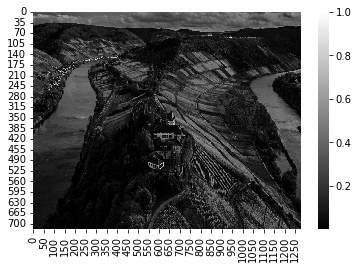

In [37]:
gamma_corrected_dark = skimage.exposure.adjust_gamma(gray, 3)
show(gamma_corrected_dark)

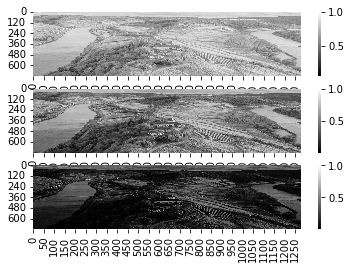

In [38]:
plt.subplot(3,1,1)
show(gamma_corrected_light)

plt.subplot(3,1,2)
show(gray)

plt.subplot(3,1,3)
show(gamma_corrected_dark)

plt.savefig("../figures/gamma_gray.pdf",bbox_inches="tight")

## 均值滤波

In [39]:
size = 50

In [40]:
# https://scikit-image.org/docs/stable/auto_examples/numpy_operations/plot_structuring_elements.html#sphx-glr-auto-examples-numpy-operations-plot-structuring-elements-py
kernel = skimage.morphology.square(size)
kernel

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

/tmp/ipykernel_100074/3938663663.py:2: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  avg = skimage.filters.rank.mean(gray, footprint=kernel)


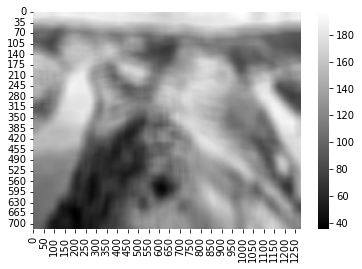

In [41]:
# https://scikit-image.org/docs/stable/api/skimage.filters.rank.html#skimage.filters.rank.mean
avg = skimage.filters.rank.mean(gray, footprint=kernel)
show(avg)

/tmp/ipykernel_100074/784132605.py:5: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  show(skimage.filters.rank.mean(gray, footprint= skimage.morphology.square(20)))


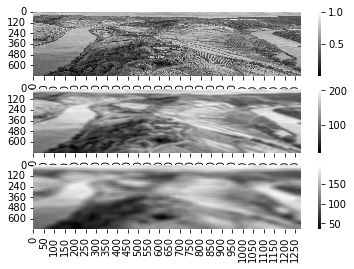

In [42]:
plt.subplot(3,1,1)
show(gray)

plt.subplot(3,1,2)
show(skimage.filters.rank.mean(gray, footprint= skimage.morphology.square(20)))

plt.subplot(3,1,3)
show(avg)
plt.savefig("../figures/avg.pdf",bbox_inches="tight")

In [43]:
def update(size = 5):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    kernel = skimage.morphology.square(size)
    avg = skimage.filters.rank.mean(gray, footprint=kernel)
    ax.set_title(f"size = {size}")
    ax.imshow(avg,cmap="gray")

    fig.canvas.draw()

interact(update,size=(0,100));

interactive(children=(IntSlider(value=5, description='size'), Output()), _dom_classes=('widget-interact',))

## 锐化

In [85]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16,9)

In [86]:
import scipy.ndimage as ndi

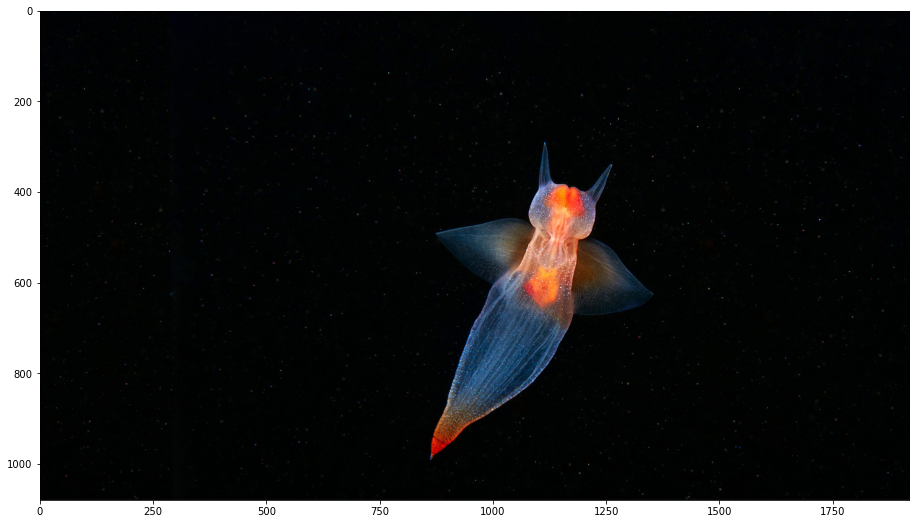

In [145]:
# bing 2022-10-30
fish = skimage.io.imread("../images/fish.jpeg")
# fish = skimage.io.imread("../images/Lenna.png")
show(fish, gray=False)
plt.savefig("../figures/fish.pdf")

In [146]:
fish.shape

(1080, 1920, 3)

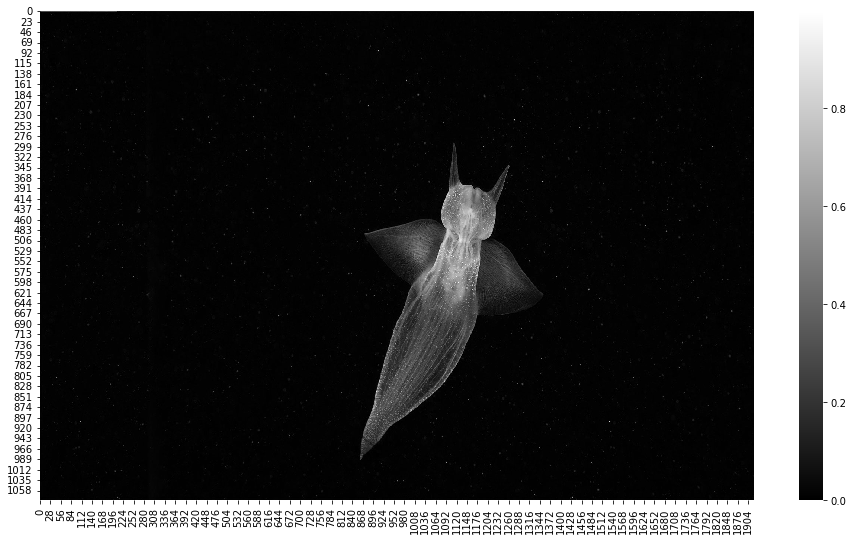

In [147]:
gray = skimage.color.rgb2gray(fish)
show(gray)

### Sobel

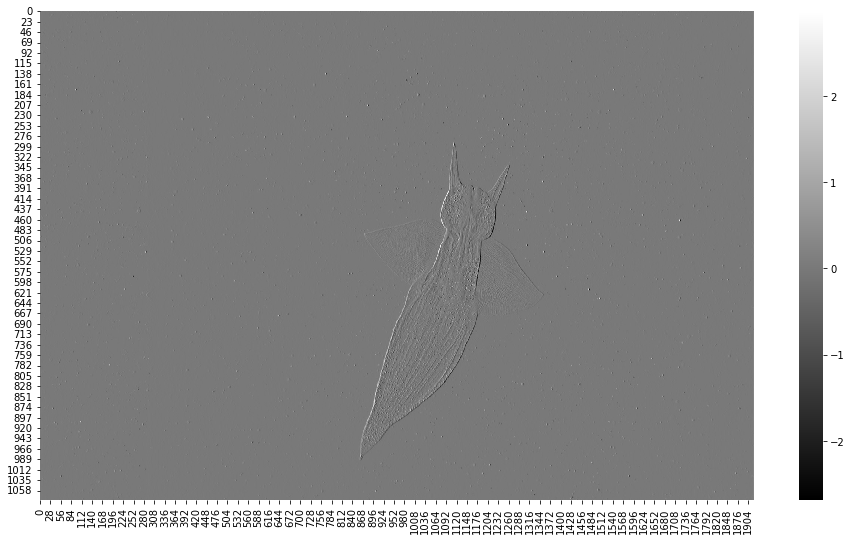

In [148]:
kernel_x = np.array([
    [1,0,-1],
    [2,0,-2],
    [1,0,-1]])
x_sharpen = ndi.convolve(gray, kernel_x)
show(x_sharpen)

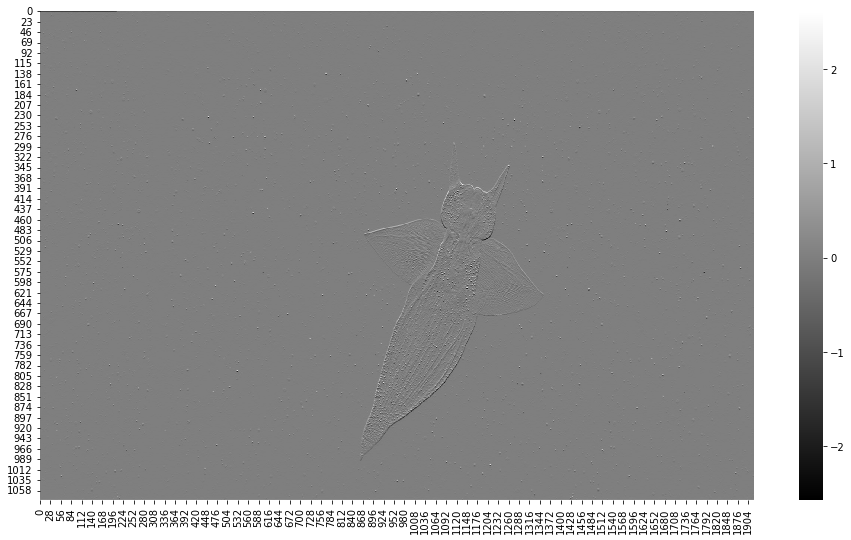

In [149]:
kernel_y = np.array([
    [1,2,1],
    [0,0,0],
    [-1,-2,-1]])
y_sharpen = ndi.convolve(gray,kernel_y)
show(y_sharpen)

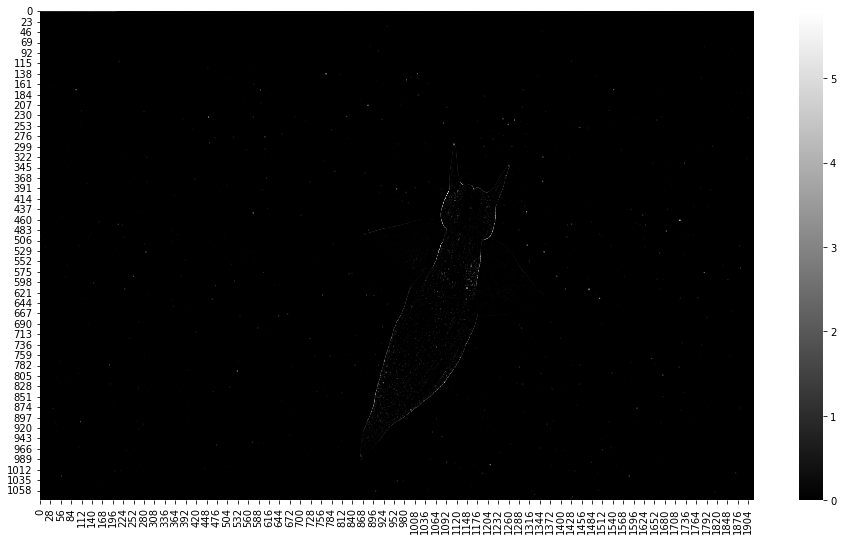

In [150]:
show((x_sharpen ** 2 + y_sharpen ** 2) ** 1/2)

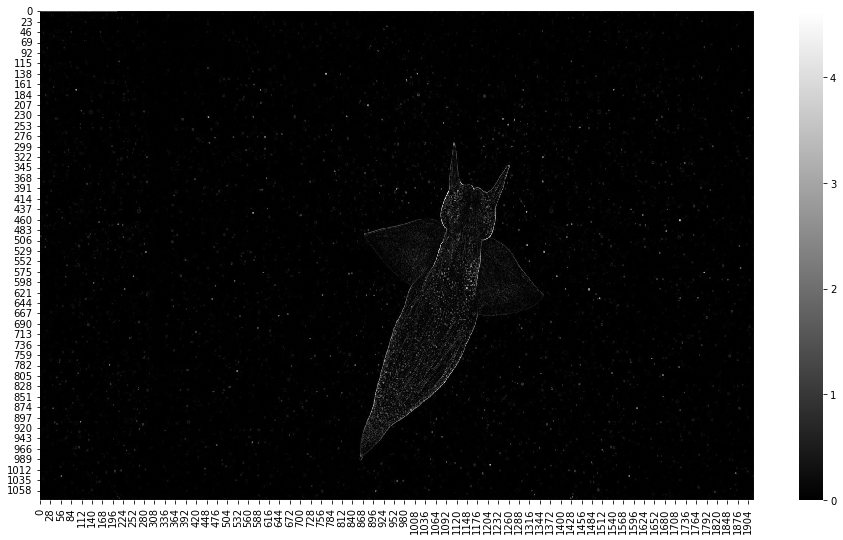

In [151]:
sobel_abs = abs(x_sharpen) + abs(y_sharpen)
show(sobel_abs)

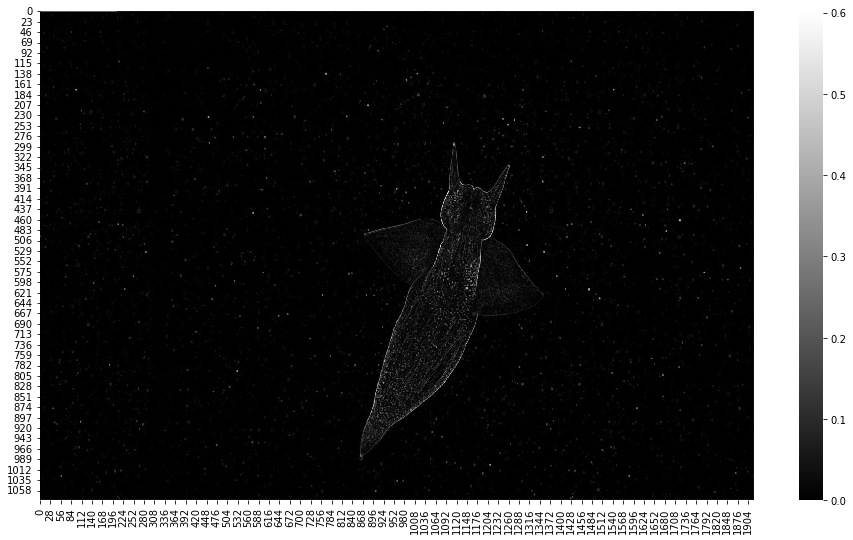

In [152]:
sobel = skimage.filters.sobel(gray)
show(sobel)

<AxesSubplot:ylabel='Density'>

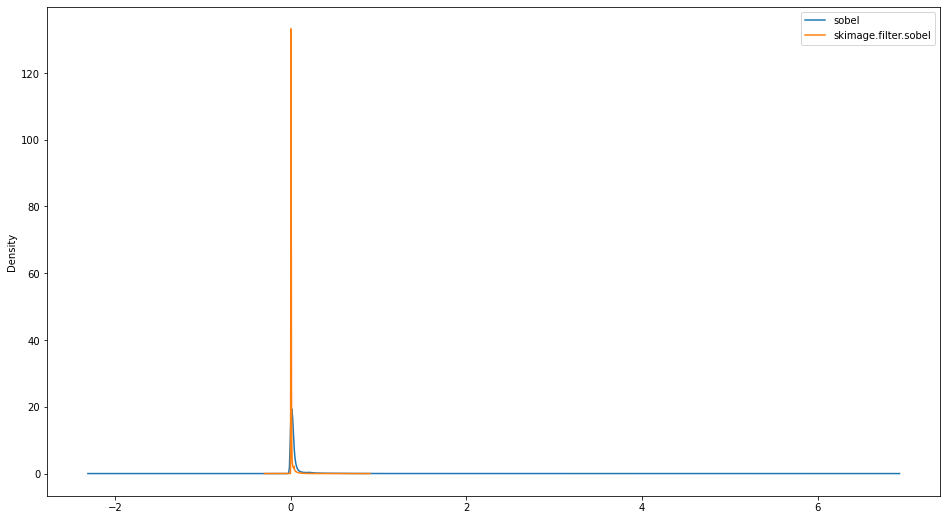

In [153]:
pd.DataFrame({"sobel": sobel_abs.flatten(), "skimage.filter.sobel": sobel.flatten()}).plot(kind="kde")

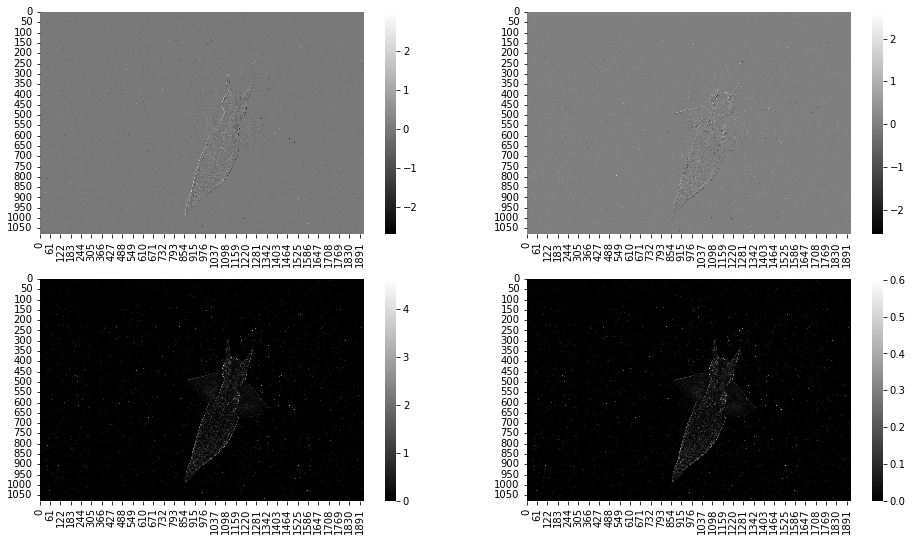

In [154]:
plt.subplot(2,2,1)
show(x_sharpen)

plt.subplot(2,2,2)
show(y_sharpen)

plt.subplot(2,2,3)
show(sobel_abs)

plt.subplot(2,2,4)
show(sobel)

plt.savefig("../figures/sobel.pdf",bbox_inches="tight")

### personal kernel

$$
    G'x = \begin{bmatrix}
        -1 & 0 & 1 \\
        -1 & 0 & 1 \\
        -1 & 0 & 1
    \end{bmatrix}
    \circledast A 
$$

$$
    G'y = \begin{bmatrix}
        1 & 1 & 1 \\
        0 & 0 & 0 \\
        -1 & -1 & -1
    \end{bmatrix}
    \circledast A 
$$

$$
    A'(x,y) = |G'_x(x,y)| + |G'_y(x,y)| 
$$

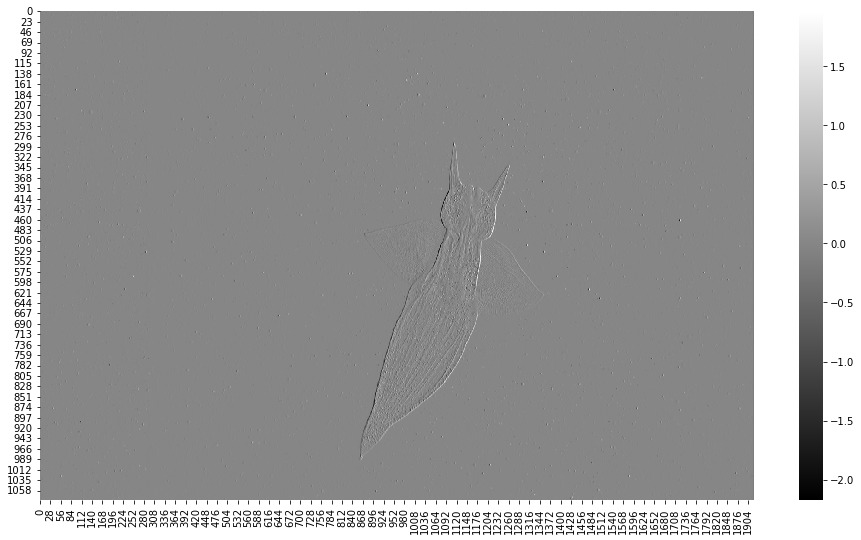

In [155]:
kernel_x = np.array([
    [-1,0,1],
    [-1,0,1],
    [-1,0,1]])
x_sharpen = ndi.convolve(gray, kernel_x)
show(x_sharpen)

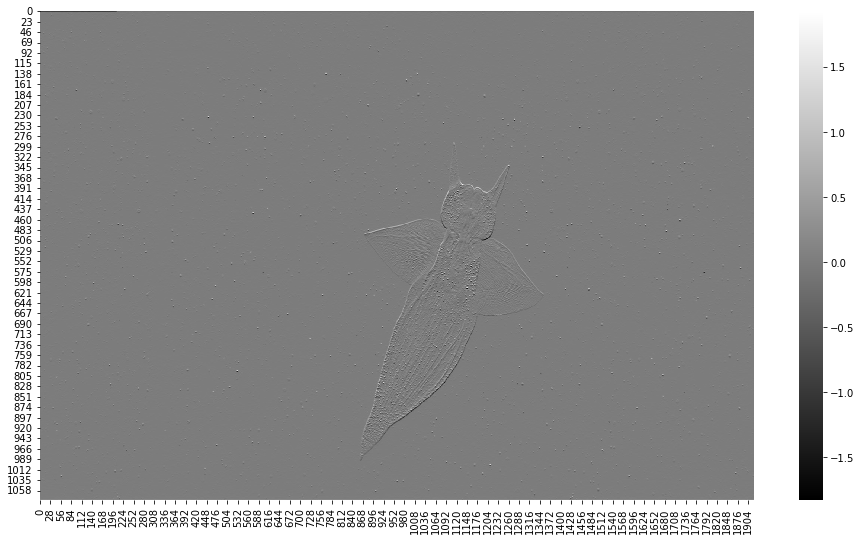

In [156]:
kernel_y = np.array([
    [1,1,1],
    [0,0,0],
    [-1,-1,-1]])
y_sharpen = ndi.convolve(gray,kernel_y)
show(y_sharpen)

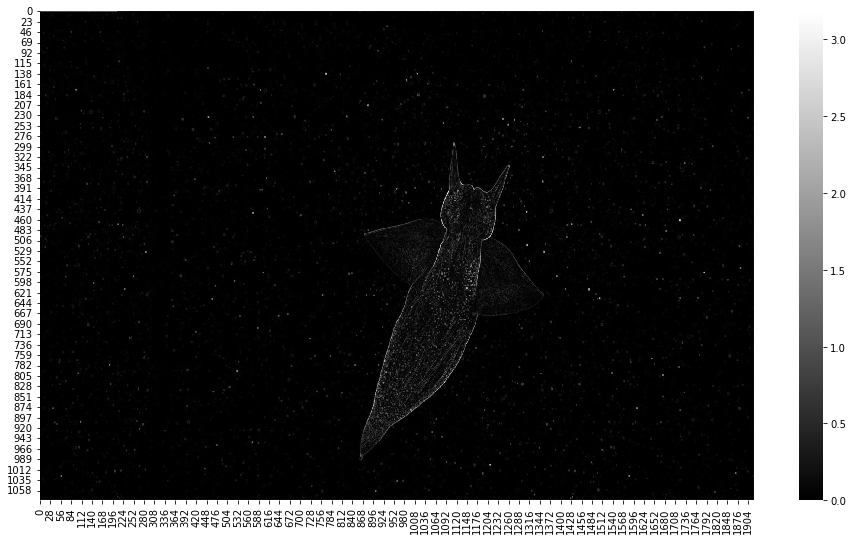

In [157]:
new_abs = abs(x_sharpen) + abs(y_sharpen)
show(new_abs)

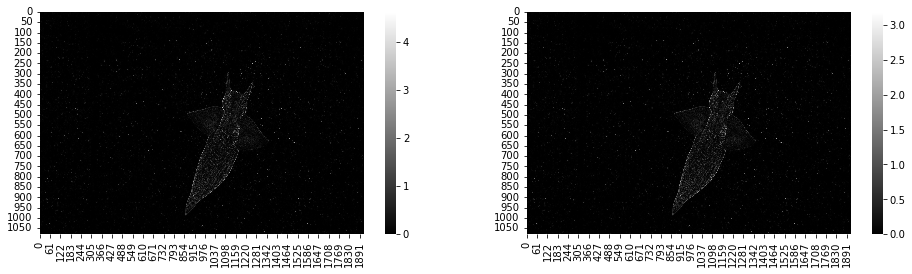

In [158]:
plt.subplot(2,2,1)
show(sobel_abs)

plt.subplot(2,2,2)
show(new_abs)

plt.savefig("../figures/sobel_vs_personal.pdf",bbox_inches="tight")

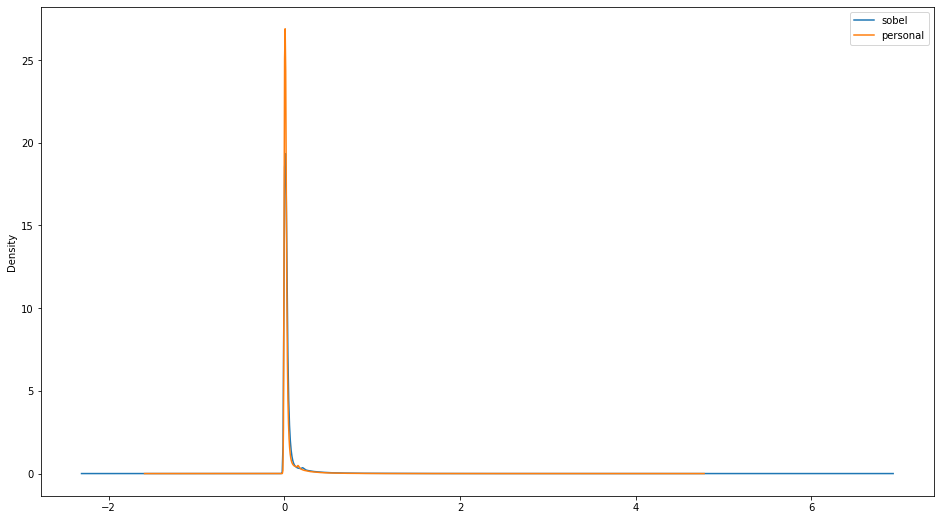

In [159]:
pd.DataFrame({"sobel": sobel_abs.flatten(), "personal": new_abs.flatten()}).plot(kind="kde")
plt.savefig("../figures/sobel_compare.pdf")

### design a kernel

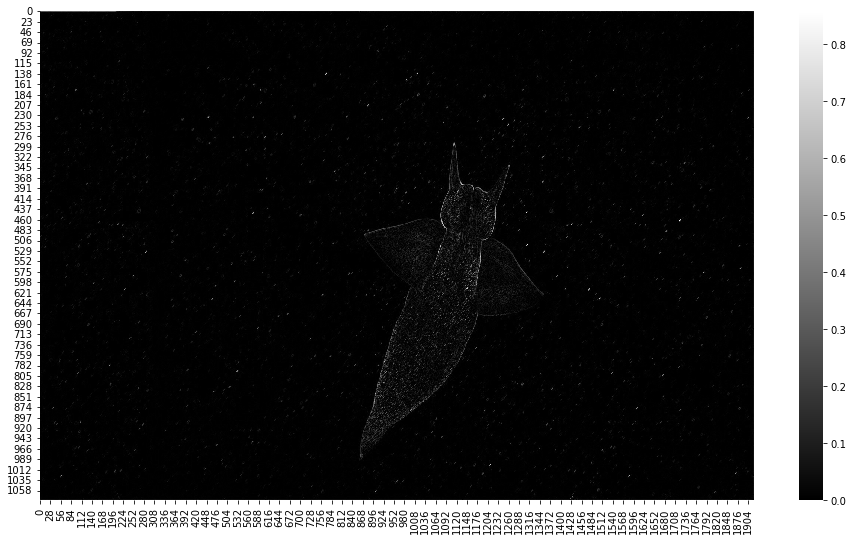

In [160]:
kernel_13 = np.array([
    [0,0,1],
    [0,0,0],
    [-1,0,0]])
sharpen_13 = abs(ndi.convolve(gray, kernel_13))
show(sharpen_13)

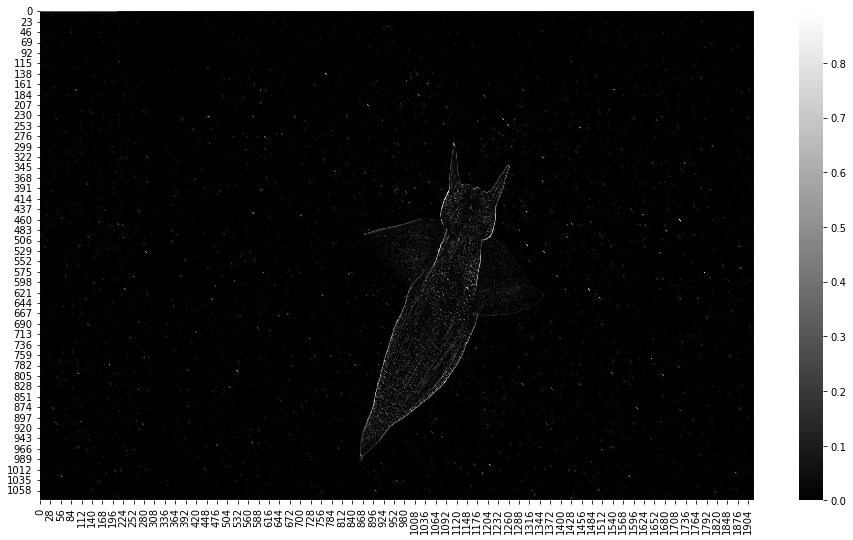

In [161]:
kernel_24 = np.array([
    [1,0,0],
    [0,0,0],
    [0,0,-1]])
sharpen_24 = abs(ndi.convolve(gray, kernel_24))
show(sharpen_24)

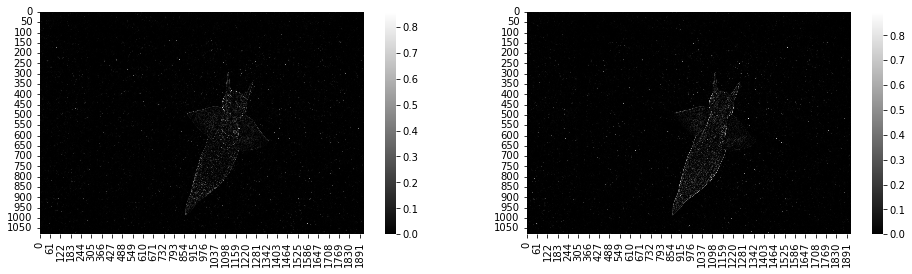

In [169]:
plt.subplot(2,2,1)
show(sharpen_13)

plt.subplot(2,2,2)
show(sharpen_24)

plt.savefig("../figures/sharpen_13_24.pdf",bbox_inches="tight")

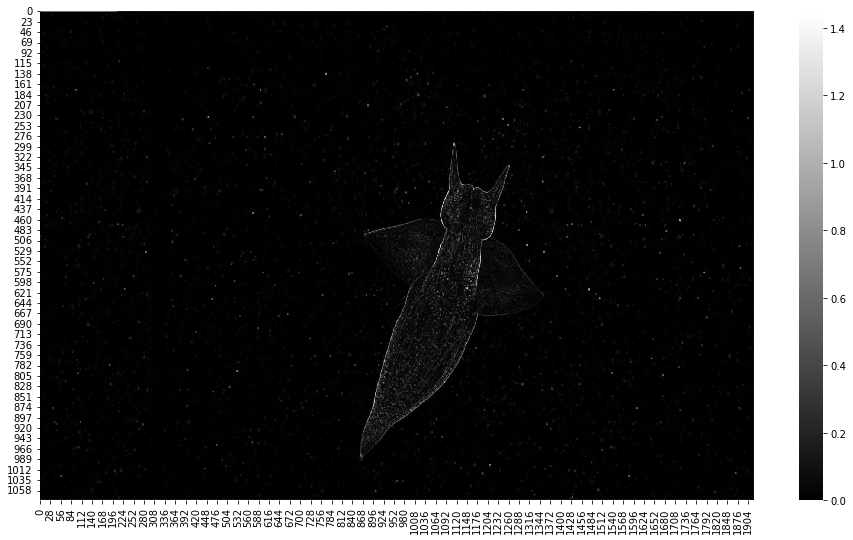

In [170]:
show(sharpen_13+sharpen_24)
plt.savefig("../figures/sharpen_13+24.pdf",bbox_inches="tight")